# Get data for BASE-9

This notebook tests my codes to grab data from Gaia, Pan-STARRS, and 2MASS, then use Gaia data to estimate membership probabilities, and output a phot file for BASE-9

### Gaia:
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html
- https://gea.esac.esa.int/archive/documentation/GEDR3/index.html

### Pan-STARRS:
- https://gaia.aip.de/metadata/gaiaedr3/panstarrs1_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_panstarrs1_original_valid.html
- https://allendowney.github.io/AstronomicalData/05_join.html

### 2MASS:
- https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries
- https://gaia.aip.de/metadata/gaiaedr3/tmass_psc_xsc_best_neighbour/
- https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_crossmatches/ssec_dm_tmass_psc_xsc_join.html
- https://gea.esac.esa.int/archive/documentation/GDR2/Gaia_archive/chap_datamodel/sec_dm_external_catalogues/ssec_dm_tmass_original_valid.html



In [145]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as units

In [83]:
%load_ext autoreload
%autoreload 2
from getGaiaData import GaiaClusterMembers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
# Generally, we can pull the central coordinates and size from my OC summary data here : 
# https://github.com/ageller/compileOCs
NGC188 = GaiaClusterMembers(12.108, 85.255, 1.)
NGC188.verbose = 1
NGC188.getData()
NGC188.data

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]


source_id,ra,dec,pmra,pmdec,dr2_radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32
573780383473363584,17.551615302057552,85.4005497609494,0.48361560478935334,2.7392859876776883,--,18.983492,502.1729,19.543112,28.89818,18.348892,43.83603,0.18511231016623875,1.0087261,1,0,19.5872001647949,0.0188059993088245,18.963399887085,0.0155339995399117,18.6891994476318,0.0103639997541904,18.5832996368408,0.011680000461638,18.4176998138428,0.0529999993741512,17.164,0.204,16.489,0.262,15.964,0.275,0.0035023368,0.037674554,0.025054812
573780387769059200,17.54984437664789,85.39892724061632,-2.1609450344355134,-1.8690525036624548,--,20.627653,120.36107,21.32197,6.7748113,19.604689,13.532256,0.9984286700919319,0.9779742,1,0,21.4671993255615,0.143189996480942,20.7693996429443,0.0346660017967224,19.9143009185791,0.0136940004304051,19.4983005523682,0.0377690009772778,18.9666996002197,0.0552759990096092,--,--,--,--,--,--,0.009432077,0.16028501,0.08032216
573780422127855104,17.188898293996598,85.38207541380389,-4.228891739354731,4.344376435030026,--,14.814148,3372.5557,15.123341,113.27221,14.115689,48.88691,1.1150571159333875,1.1777109,--,--,--,--,--,--,--,--,--,--,--,--,13.0,0.032,12.845,0.05,12.643,0.033,0.0027740637,0.009983036,0.02252842
573780422127855360,17.193861544007298,85.38168247548535,-3.525026608813936,-6.845611711738799,--,15.009426,3399.6174,15.429264,92.83738,14.385344,170.25902,1.2523486547329834,1.3208025,--,--,--,--,--,--,--,--,--,--,--,--,13.0,0.032,12.845,0.05,12.643,0.033,0.0027737676,0.012023262,0.007412789
573780456487595520,17.335276033295496,85.38062757056113,-6.503324485836155,-1.1750116281554763,--,18.654633,607.6569,19.835842,24.831295,17.537947,90.643616,1.088434028205643,1.0011882,1,0,20.2485008239746,0.050051998347044,18.9613990783691,0.0165720004588366,17.9634990692139,0.0047109997831285,17.5251007080078,0.00554900011047721,17.2824001312256,0.00960200000554323,16.005,0.079,15.439,0.124,15.124,0.129,0.0032839451,0.04381344,0.012560177
573780456489344384,17.231743332395272,85.38255186898644,0.31634591246981425,3.1798951825515918,--,17.46065,1226.4967,17.950705,80.33327,16.788633,132.75949,0.5018495584113969,1.0316184,1,0,18.0587005615234,0.00662899995222688,17.431999206543,0.00795399956405163,17.1720008850098,0.00388199998997152,17.0823993682861,0.00741800013929605,16.9736995697021,0.00970099959522486,16.061,0.082,15.52,0.129,15.438,0.17,0.0028940332,0.0138004,0.009009272
573780486552572672,17.008316902524513,85.38422798783371,-1.7118121610753572,0.704666569417206,--,16.373852,1398.2766,16.777369,189.23943,15.814927,380.97092,0.4850692046904234,0.9811877,1,0,16.8577003479004,0.00447899987921119,16.3626003265381,0.00359100010246038,16.1749000549316,0.0051150000654161,16.1189002990723,0.00496099982410669,16.0874996185303,0.0063450001180172,15.18,0.046,14.815,0.051,14.779,0.087,0.002862641,0.006379846,0.0047334726
573780486552632832,16.99029381184076,85.39402004477263,3.364376418420352,-0.4987796287077132,--,19.51989,331.19922,20.521059,11.036419,18.42013,52.108105,0.49994107308312785,1.0758348,1,0,20.9771995544434,0.0541450008749962,19.8752002716064,0.0361460000276566,18.8257999420166,0.0101920003071

In [90]:
NGC188.data.columns

<TableColumns names=('source_id','ra','dec','pmra','pmdec','dr2_radial_velocity','phot_g_mean_mag','phot_g_mean_flux_over_error','phot_bp_mean_mag','phot_bp_mean_flux_over_error','phot_rp_mean_mag','phot_rp_mean_flux_over_error','parallax','ruwe','number_of_neighbours','number_of_mates','g_mean_psf_mag','g_mean_psf_mag_error','r_mean_psf_mag','r_mean_psf_mag_error','i_mean_psf_mag','i_mean_psf_mag_error','z_mean_psf_mag','z_mean_psf_mag_error','y_mean_psf_mag','y_mean_psf_mag_error','j_m','j_msigcom','h_m','h_msigcom','ks_m','ks_msigcom','phot_g_mean_mag_error','phot_bp_mean_mag_error','phot_rp_mean_mag_error')>

(-2.0, 4.0)

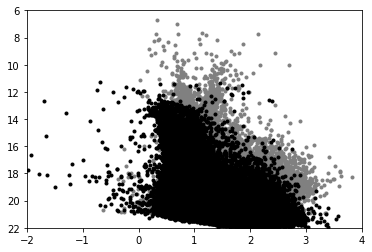

In [103]:
f, ax = plt.subplots()
ax.plot(NGC188.data['phot_bp_mean_mag'] - NGC188.data['phot_rp_mean_mag'], NGC188.data['phot_g_mean_mag'],'.', color='gray')
ax.plot(NGC188.data['g_mean_psf_mag'] - NGC188.data['i_mean_psf_mag'], NGC188.data['g_mean_psf_mag'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [92]:
NGC188.plotNameRoot = 'plots/'
NGC188.verbose = 0

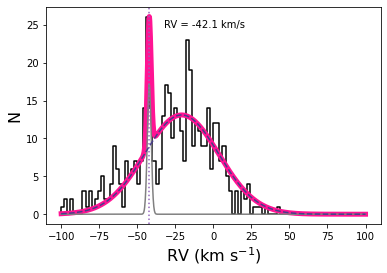

In [93]:
NGC188.getRVMembers()

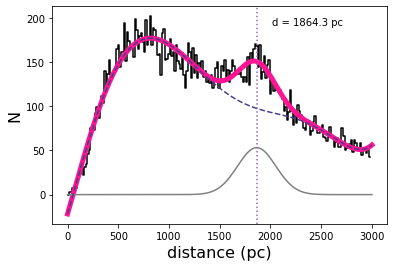

In [94]:
NGC188.distance = 1900 #pc
NGC188.getParallaxMembers()

finding proper-motion members ...


C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:315: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], pmG2D(xf, yf).T, cmap=cm.RdPu, bins = 20, \


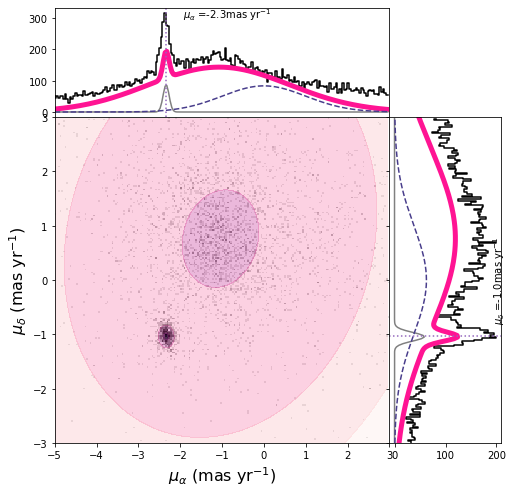

In [95]:
# this is very hard to fit for NGC 188!
NGC188.PMxmin = -5
NGC188.PMxmax = 3
NGC188.PMymin = -3
NGC188.PMymax = 3
NGC188.PMmean = [-2.5, -1]
NGC188.PMxbins = 200
NGC188.PMybins = 200
NGC188.verbose = 1
NGC188.getPMMembers()

In [96]:
NGC188.data

source_id,ra,dec,pmra,pmdec,dr2_radial_velocity,phot_g_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,parallax,ruwe,number_of_neighbours,number_of_mates,g_mean_psf_mag,g_mean_psf_mag_error,r_mean_psf_mag,r_mean_psf_mag_error,i_mean_psf_mag,i_mean_psf_mag_error,z_mean_psf_mag,z_mean_psf_mag_error,y_mean_psf_mag,y_mean_psf_mag_error,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,PRV,PPa,PPM
,deg,deg,mas / yr,mas / yr,km / s,mag,,mag,,mag,,mas,,,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,
int64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64
573780383473363584,17.551615302057552,85.4005497609494,0.48361560478935334,2.7392859876776883,--,18.983492,502.1729,19.543112,28.89818,18.348892,43.83603,0.18511231016623875,1.0087261,1,0,19.5872001647949,0.0188059993088245,18.963399887085,0.0155339995399117,18.6891994476318,0.0103639997541904,18.5832996368408,0.011680000461638,18.4176998138428,0.0529999993741512,17.164,0.204,16.489,0.262,15.964,0.275,0.0035023368,0.037674554,0.025054812,--,6.098520405315247e-80,0.0
573780387769059200,17.54984437664789,85.39892724061632,-2.1609450344355134,-1.8690525036624548,--,20.627653,120.36107,21.32197,6.7748113,19.604689,13.532256,0.9984286700919319,0.9779742,1,0,21.4671993255615,0.143189996480942,20.7693996429443,0.0346660017967224,19.9143009185791,0.0136940004304051,19.4983005523682,0.0377690009772778,18.9666996002197,0.0552759990096092,--,--,--,--,--,--,0.009432077,0.16028501,0.08032216,--,9.234817180446515e-06,7.631380164201845e-23
573780422127855104,17.188898293996598,85.38207541380389,-4.228891739354731,4.344376435030026,--,14.814148,3372.5557,15.123341,113.27221,14.115689,48.88691,1.1150571159333875,1.1777109,--,--,--,--,--,--,--,--,--,--,--,--,13.0,0.032,12.845,0.05,12.643,0.033,0.0027740637,0.009983036,0.02252842,--,6.078718365978604e-07,0.0
573780422127855360,17.193861544007298,85.38168247548535,-3.525026608813936,-6.845611711738799,--,15.009426,3399.6174,15.429264,92.83738,14.385344,170.25902,1.2523486547329834,1.3208025,--,--,--,--,--,--,--,--,--,--,--,--,13.0,0.032,12.845,0.05,12.643,0.033,0.0027737676,0.012023262,0.007412789,--,3.660231569817181e-08,0.0
573780456487595520,17.335276033295496,85.38062757056113,-6.503324485836155,-1.1750116281554763,--,18.654633,607.6569,19.835842,24.831295,17.537947,90.643616,1.088434028205643,1.0011882,1,0,20.2485008239746,0.050051998347044,18.9613990783691,0.0165720004588366,17.9634990692139,0.0047109997831285,17.5251007080078,0.00554900011047721,17.2824001312256,0.00960200000554323,16.005,0.079,15.439,0.124,15.124,0.129,0.0032839451,0.04381344,0.012560177,--,1.1001561657844878e-06,0.0
573780456489344384,17.231743332395272,85.38255186898644,0.31634591246981425,3.1798951825515918,--,17.46065,1226.4967,17.950705,80.33327,16.788633,132.75949,0.5018495584113969,1.0316184,1,0,18.0587005615234,0.00662899995222688,17.431999206543,0.00795399956405163,17.1720008850098,0.00388199998997152,17.0823993682861,0.00741800013929605,16.9736995697021,0.00970099959522486,16.061,0.082,15.52,0.129,15.438,0.17,0.0028940332,0.0138004,0.009009272,--,0.3113240466203562,0.0
573780486552572672,17.008316902524513,85.38422798783371,-1.7118121610753572,0.704666569417206,--,16.373852,1398.2766,16.777369,189.23943,15.814927,380.97092,0.4850692046904234,0.9811877,1,0,16.8577003479004,0.00447899987921119,16.3626003265381,0.00359100010246038,16.1749000549316,0.0051150000654161,16.1189002990723,0.00496099982410669,16.0874996185303,0.0063450001180172,15.18,0.046,14.815,0.051,14.779,0.087,0.002862641,0.006379846,0.0047334726,--,0.2519822357077598,2.8521200356070017e-122
57378048655263283

In [97]:
NGC188.combineMemberships()

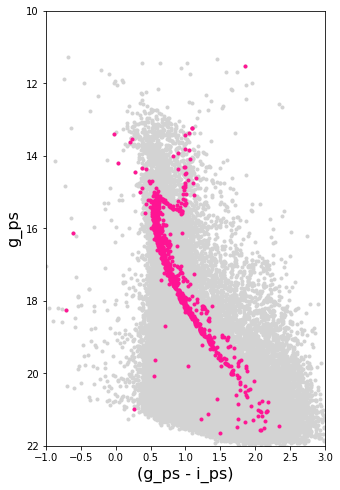

In [98]:
NGC188.membershipMin = 0.01
NGC188.plotCMD()

In [165]:
# output a .phot file for BASE-9
# I may want to rename the .py file.  When finished, upload to Drive
# double check with proposal that this is the only photometry we proposed to use
NGC188.photOutputFileName = 'inputs/ngc188.phot'
NGC188.generatePhotFile()

generating phot file ...


(-2.0, 4.0)

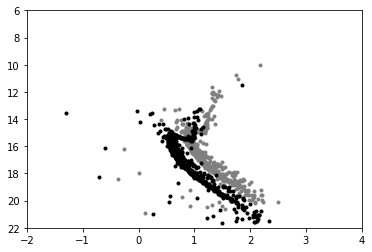

In [104]:
df = pd.read_csv(NGC188.photFileName, delimiter=' ')
f, ax = plt.subplots()
ax.plot(df['G_BPbr'] - df['G_RP'], df['G'],'.', color='gray')
ax.plot(df['g_ps'] - df['i_ps'], df['g_ps'],'.', color='black')
ax.set_ylim(22, 6)
ax.set_xlim(-2,4)

In [125]:
# output a base9.yaml file for BASE-9?
NGC188.yamlOutputFileName = 'inputs/base9.yaml'
NGC188.yamlTemplateFileName = 'template_base9.yaml'
NGC188.yamlInputDict = {
    'photFile' : 'ngc188.phot',
    'outputFileBase' : 'output/ngc188',
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [0., 0., 0.3],
    'Av' : [0., 0., 0.3],
    'Y' : [0.29, 0.29, 0.0],
    'carbonicity' : [0.38, 0.38, 0.0],
    'logAge' : [9., 9., np.inf],
    'distMod' : [10., 10., 1.],
}

NGC188.generateYamlFile()

## Testing as pipeline

(Though it will require some tweaking for clusters to define, e.g., distance, PM, etc.)

In [190]:
# read in my OC file and see if I can use that to define the input values
# https://github.com/ageller/compileOCs/blob/master/OCcompiled_clean.csv
clusterName = 'NGC_188'

OCdf = pd.read_csv('OCcompiled_clean_v2.csv')
row = OCdf.loc[OCdf['ID'] == clusterName].iloc[0]

# get the cluster center
center = SkyCoord(row['RA[hr]'], row['Dec[deg]'], unit=(units.hourangle, units.degree))
center.ra.to(units.degree).value

#calculate the distance modulus and error
dmod = 5.*np.log10(row['dist[pc]']) - 5.
err_dmod = (5.*1./np.log(10.)*(1./row['dist[pc]']))*row['err_dist[pc]'] # error propagation

# estimate the cluster tidal radius 
# equation from Binney and Tremaine for Jacoby Radius (8.91)
# at least for NGC 188, this seems a bit small...
# I'm adding a factor of 2 in front

# want this in degrees
Mg = 1.0*10**12 #*units.solMass #this probably could use verification and a reference
rt = row['rgc[pc]']*(row['mass[Msun]']/(3.*Mg))**(1./3.)
rtfac = 5.
radius = rtfac*np.arctan2(rt, row['dist[pc]'])*180./np.pi
print(radius, rt, dmod, err_dmod)
                  
# Note: many clusters won't have Av (and other values)
# for Av, I can get a value from a model, or just use 0

0.9147444428436675 6.124470445695659 11.414299621162435 0.08116582782552814


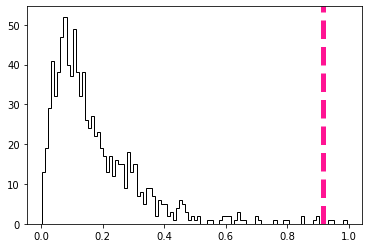

In [191]:
# quick check on the calculated tidal radius
f, ax = plt.subplots()
_ = ax.hist(NGC188.members['rCenter'].data, histtype='step', color='black', bins = 100)
ax.axvline(radius, ls='dashed', lw=5, color='deeppink')

In [192]:
row

ID                       NGC_188
RA[hr]              00 47 11.520
Dec[deg]            85 14 38.400
ID_Simbad                NGC_188
ID_MWSC                  NGC_188
ID_WEBDA                 NGC_188
ID_Piskunov                  NaN
ID_Kharchenko            NGC_188
ID_Salaris               NGC_188
ID_vandenBergh           NGC_188
ID_Cantat-Gaudin         NGC_188
ID_Lynga                 NGC_188
dist[pc]                 1918.05
err_dist[pc]           71.693343
N_dist[pc]                   6.0
age[Myr]             4051.035236
err_age[Myr]          952.045608
N_age[Myr]                   5.0
[Fe/H]                     -0.03
err_[Fe/H]              0.018708
N_[Fe/H]                     1.0
mass[Msun]                 838.1
err_mass[Msun]         481.16127
N_mass[Msun]                 5.0
rgc[pc]                  9368.65
err_rgc[pc]            13.187541
N_rgc[pc]                    2.0
rhm[pc]                 4.613305
err_rhm[pc]             0.317169
N_rhm[pc]                    1.0
Av[mag]   

Retrieving Gaia data ... 
INFO: Query finished. [astroquery.utils.tap.core]
Finding radial-velocity members ... 
Finding parallax members ... 


finding proper-motion members ...


C:\Users\ageller\WORK\BASE-9\BASE9_utils\getGaiaData\getGaiaData.py:338: UserWarning: The following kwargs were not used by contour: 'bins'
  ax2.contourf(x2D[:-1], y2D[:-1], pmG2D(xf, yf).T, cmap=cm.RdPu, bins = 20, \


combining memberships ...
plotting CMD ...
generating phot file ...
generating yaml file ...
done.


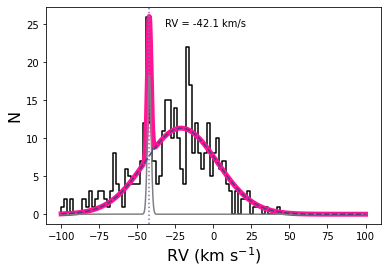

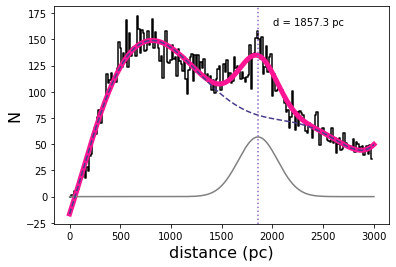

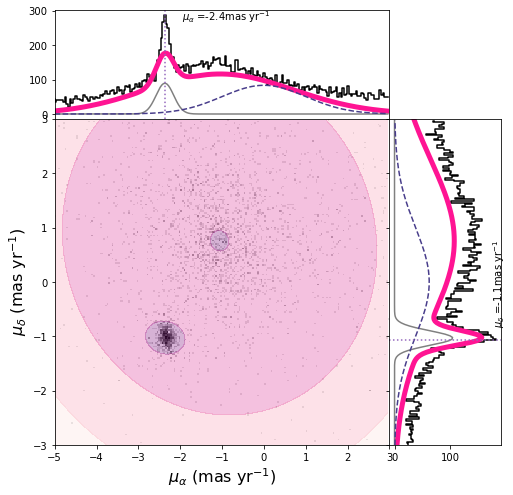

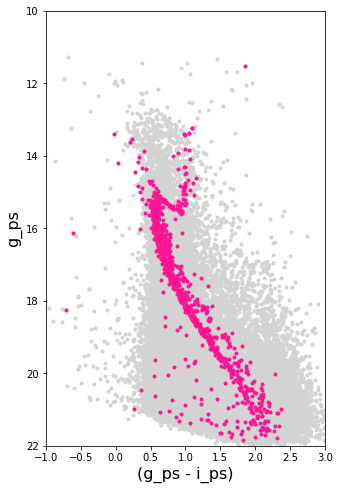

In [194]:
# I should test with reading in from my compiled OC list
cluster = GaiaClusterMembers(center.ra.to(units.degree).value, center.dec.to(units.degree).value, radius)
cluster.plotNameRoot = 'plots/'
cluster.distance = row['dist[pc]'] #pc
########
# this is not in my table.  I may want to work on making the code more robust so this is not needed
cluster.PMxmin = -5
cluster.PMxmax = 3
cluster.PMymin = -3
cluster.PMymax = 3
cluster.PMmean = [-2.5, -1]
cluster.PMxbins = 200
cluster.PMybins = 200
########
cluster.membershipMin = 0.01
cluster.verbose = 1
cluster.photOutputFileName = 'inputs/' + clusterName + '.phot'
cluster.yamlOutputFileName = 'inputs/base9.yaml'
cluster.yamlTemplateFileName = 'template_base9.yaml'
cluster.yamlInputDict = {
    'photFile' : 'inputs/' + clusterName + '.phot',
    'outputFileBase' : 'output/' + clusterName,
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [row['[Fe/H]'].value, row['[Fe/H]'].value, row['err_[Fe/H]'].value],
    'Av' : [row['Av[mag]'].value, row['Av[mag]'].value, row['err_Av[mag]'].value],
    'Y' : [0.29, 0.29, 0.0], # keep the defaults
    'carbonicity' : [0.38, 0.38, 0.0], # keep the defaults
    'logAge' : [np.log10(row['age[Myr]'].value*10**6), np.log10(row['age[Myr]'].value*10**6), np.inf],
    'distMod' : [dmod, dmod, err_dmod],
}
cluster.runAll()

In [204]:
cluster.yamlInputDict = {
    'photFile' : 'inputs/' + clusterName + '.phot',
    'outputFileBase' : 'output/' + clusterName,
    'modelDirectory' : 'base-models/',
    'msRgbModel' : 5,
    'Fe_H' : [float(row['[Fe/H]'].astype('float')), row['[Fe/H]'].astype('float'), row['err_[Fe/H]'].astype('float')],
    'Av' : [row['Av[mag]'].astype('float'), row['Av[mag]'].astype('float'), row['err_Av[mag]'].astype('float')],
    'Y' : [0.29, 0.29, 0.0], # keep the defaults
    'carbonicity' : [0.38, 0.38, 0.0], # keep the defaults
    'logAge' : [np.log10(row['age[Myr]'].astype('float')*10**6), np.log10(row['age[Myr]'].astype('float')*10**6), np.inf],
    'distMod' : [dmod, dmod, err_dmod],
}
cluster.generateYamlFile()

generating yaml file ...


In [197]:
row['[Fe/H]'].astype('float')

-0.03

In [205]:
type(cluster.yamlInputDict['Fe_H'][0])

float